In [181]:
import pandas as pd
df = pd.read_csv('null_free_subset.csv')
df = df.drop(columns=['Unnamed: 0'])

In [182]:
df.head()

,Vase Number,Fabric,Technique,Shape Name,Provenance,Date,Inscriptions
0,1.0,ATHENIAN,BLACK-FIGURE,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-525 to -475,0
1,2.0,ATHENIAN,BLACK-FIGURE,"KRATER, COLUMN FRAGMENT","GREECE, ATHENS, AGORA",-550 to -500,0
2,3.0,ATHENIAN,BLACK-FIGURE,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-550 to -500,0
3,12.0,ATHENIAN,BLACK-FIGURE,"AMPHORA, PANATHENAIC PRIZE FRAGMENT","GREECE, ATHENS, AGORA",-300 to -200,1
4,22.0,ATHENIAN,RED-FIGURE,CHOUS FRAGMENT,"GREECE, AEGINA",-450 to -400,0


In [183]:
df.shape

(49523, 7)

In [184]:
df['Fabric'].value_counts()

ATHENIAN                        49413
ATHENIAN (?)                       26
EAST GREEK                         16
SOUTH ITALIAN, APULIAN             11
EUBOEAN                             8
CHALCIDIAN                          7
SOUTH ITALIAN, LUCANIAN             5
NORTH GREEK                         5
PROTOCORINTHIAN                     4
CORINTHIAN                          4
BOEOTIAN                            3
ATHENIAN SUBGEOMETRIC               3
BOSPHORIAN                          2
ITALIOTE                            2
BOEOTIAN (?)                        2
HELLENISTIC                         1
THASIAN                             1
IMITATION OF ATHENIAN               1
SOUTH ITALIAN, CAMPANIAN (?)        1
PROTOATTIC                          1
LACONIAN                            1
SOUTH ITALIAN, PAESTAN              1
ATHENIAN GEOMETRIC                  1
BOEOTIAN, CABIRION WARE             1
SICILIAN                            1
ETRUSCAN                            1
EAST GREEK, 

In [185]:
# Define a mapping dictionary to group similar values
fabric_mapping = {
    'ATHENIAN (?)': 'ATHENIAN',
    'ATHENIAN SUBGEOMETRIC': 'ATHENIAN',
    'ATHENIAN GEOMETRIC': 'ATHENIAN',
    'IMITATION OF ATHENIAN': 'ATHENIAN',
    'SOUTH ITALIAN, PAESTAN': 'SOUTH ITALIAN',
    'SOUTH ITALIAN, APULIAN': 'SOUTH ITALIAN',
    'SOUTH ITALIAN, LUCANIAN': 'SOUTH ITALIAN',
    'SOUTH ITALIAN, CAMPANIAN (?)': 'SOUTH ITALIAN',
    'BOEOTIAN (?)': 'BOEOTIAN',
    'BOEOTIAN, CABIRION WARE': 'BOEOTIAN',
    'EAST GREEK, CLAZOMENIAN': 'EAST GREEK',
}

# Create a new column 'Fabric_Grouped' based on the mapping
df['Fabric_Grouped'] = df['Fabric'].map(fabric_mapping).fillna(df['Fabric'])

# Count occurrences of each grouped fabric value
df['Fabric_Grouped'].value_counts()


ATHENIAN           49444
SOUTH ITALIAN         18
EAST GREEK            17
EUBOEAN                8
CHALCIDIAN             7
BOEOTIAN               6
NORTH GREEK            5
CORINTHIAN             4
PROTOCORINTHIAN        4
BOSPHORIAN             2
ITALIOTE               2
THASIAN                1
LACONIAN               1
PROTOATTIC             1
SICILIAN               1
HELLENISTIC            1
ETRUSCAN               1
Name: Fabric_Grouped, dtype: int64

In [186]:
df['Technique'].value_counts()

RED-FIGURE       25117
BLACK-FIGURE     24129
BLACK GLAZE        228
BLACK PATTERN       14
OUTLINE             14
PATTERN              5
SILHOUETTE           4
PLAIN                4
ADDED COLOUR         2
POLYCHROME           2
RELIEF               1
RED GLAZE            1
GLAZED               1
STAMPED              1
Name: Technique, dtype: int64

In [187]:
df['Shape Name'].value_counts()

LEKYTHOS                   6805
CUP FRAGMENT               4525
CUP                        1928
SKYPHOS FRAGMENT           1912
FRAGMENT                   1749
                           ... 
CHALICE FRAGMENTS             1
SPRINKLER                     1
SITULA FRAGMENTS              1
FIGURE VASE AMPHORISKOS       1
AMPHORA, BAIL                 1
Name: Shape Name, Length: 345, dtype: int64

In [188]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Function to find the best match in a list of choices for a given string
def find_best_match(string, choices):
    return process.extractOne(string, choices, scorer=fuzz.token_sort_ratio)

# Unique fabric values in the 'Fabric' column
unique_fabrics = df['Shape Name'].unique()

# Define a threshold for similarity score
threshold = 50  # You can adjust this threshold based on your needs

# Create a dictionary to store grouped fabric values
fabric_grouping = {}

# Iterate through unique fabric values
for fabric in unique_fabrics:
    # Check if the fabric is already grouped
    if fabric not in fabric_grouping:
        # Find similar fabrics based on the threshold
        similar_fabrics = [f for f in unique_fabrics if find_best_match(fabric, [f])[1] >= threshold]
        
        # Group similar fabrics together
        for similar_fabric in similar_fabrics:
            fabric_grouping[similar_fabric] = fabric

# Create a new column 'Fabric_Grouped' based on the grouping
df['Shape Name Group'] = df['Shape Name'].map(fabric_grouping).fillna(df['Shape Name'])

# Count occurrences of each grouped fabric value
df['Shape Name Group'].value_counts()

PYXIS LID FRAGMENT                      12117
ASTRAGALOS FRAGMENT                     11797
LEKANIS                                  6893
AMPHORA, NECK                            2090
CUP                                      1930
KRATER, BELL                             1367
OINOCHOE                                 1181
SKYPHOS                                  1164
PLATE, STEMMED                            968
PLAQUE                                    964
LOUTERION FRR                             952
HYDRIA                                    907
LEKYTHOS, SQUAT                           859
PSEUDO-PANATHENAIC AMPHORA FRAGMENTS      795
CUP LITTLE MASTER BAND                    790
KRATER, COLUMN FRAGMENT                   778
CUP COVERED                               572
FLASK                                     388
CHOUS (?) FR                              371
TRIPOD VASE                               295
PSYKTER                                   290
PYXIS                             

In [189]:
# Create a mapping dictionary to group similar shape names
shape_mapping = {
    'PYXIS LID FRAGMENT': 'PYXIS',
    'ASTRAGALOS FRAGMENT': 'ASTRAGALOS',
    'LEKANIS': 'LEKANIS',
    'AMPHORA, NECK': 'AMPHORA',
    'CUP': 'CUP',
    'KRATER, BELL': 'KRATER',
    'OINOCHOE': 'OINOCHOE',
    'SKYPHOS': 'SKYPHOS',
    'PLATE, STEMMED': 'PLATE',
    'PLAQUE': 'PLAQUE',
    'LOUTERION FRR': 'LOUTERION',
    'HYDRIA': 'HYDRIA',
    'LEKYTHOS, SQUAT': 'LEKYTHOS',
    'PSEUDO-PANATHENAIC AMPHORA FRAGMENTS': 'AMPHORA',
    'CUP LITTLE MASTER BAND': 'CUP',
    'KRATER, COLUMN FRAGMENT': 'KRATER',
    'CUP COVERED': 'CUP',
    'FLASK': 'FLASK',
    'CHOUS (?) FR': 'CHOUS',
    'TRIPOD VASE': 'VASE',
    'PSYKTER': 'PSYKTER',
    'PYXIS': 'PYXIS',
    'STAND': 'STAND',
    'COLUMBUS ALABASTRON': 'ALABASTRON',
    'PINAX': 'PINAX',
    'CUP KASSEL': 'CUP',
    'OLPE': 'OLPE',
    'KERNOS': 'KERNOS',
    'LOUTROPHOROS': 'LOUTROPHOROS',
    'CUP, ONE-HANDLED': 'CUP',
    'MUG': 'MUG',
    'FIGURE VASE KANTHAROS': 'VASE',
    'LID': 'LID',
    'DISH': 'DISH',
    'ARYBALLOS': 'ARYBALLOS',
    'BOLSAL': 'BOLSAL',
    'GUTTUS': 'GUTTUS',
    'MASTOS': 'MASTOS',
    'EPINETRON': 'EPINETRON',
    'RHYTON': 'RHYTON',
    'CHALICE': 'CHALICE',
    'OON': 'OON',
    'BOBBIN': 'BOBBIN',
    'FEEDER': 'FEEDER',
    'UNKNOWN': 'UNKNOWN',
}

# Create a new column 'Shape Name Grouped' based on the mapping
df['Shape Name Grouped'] = df['Shape Name Group'].map(shape_mapping).fillna(df['Shape Name Group'])

# Count occurrences of each grouped shape name
df['Shape Name Grouped'].value_counts()


PYXIS           12392
ASTRAGALOS      11797
LEKANIS          6893
CUP              3582
AMPHORA          2885
KRATER           2145
OINOCHOE         1181
SKYPHOS          1164
PLATE             968
PLAQUE            964
LOUTERION         952
HYDRIA            907
LEKYTHOS          859
FLASK             388
CHOUS             371
VASE              354
PSYKTER           290
STAND             266
ALABASTRON        247
PINAX             247
OLPE              216
KERNOS            125
LOUTROPHOROS       83
MUG                62
LID                32
DISH               26
ARYBALLOS          24
BOLSAL             24
GUTTUS             17
MASTOS             14
EPINETRON          13
RHYTON              9
OON                 7
CHALICE             7
BOBBIN              6
FEEDER              4
UNKNOWN             2
Name: Shape Name Grouped, dtype: int64

In [190]:
df = df[df['Shape Name Grouped'] != 'UNKNOWN']
df['Shape Name Grouped'].value_counts()

PYXIS           12392
ASTRAGALOS      11797
LEKANIS          6893
CUP              3582
AMPHORA          2885
KRATER           2145
OINOCHOE         1181
SKYPHOS          1164
PLATE             968
PLAQUE            964
LOUTERION         952
HYDRIA            907
LEKYTHOS          859
FLASK             388
CHOUS             371
VASE              354
PSYKTER           290
STAND             266
PINAX             247
ALABASTRON        247
OLPE              216
KERNOS            125
LOUTROPHOROS       83
MUG                62
LID                32
DISH               26
BOLSAL             24
ARYBALLOS          24
GUTTUS             17
MASTOS             14
EPINETRON          13
RHYTON              9
OON                 7
CHALICE             7
BOBBIN              6
FEEDER              4
Name: Shape Name Grouped, dtype: int64

In [191]:
df.head()

,Vase Number,Fabric,Technique,Shape Name,Provenance,Date,Inscriptions,Fabric_Grouped,Shape Name Group,Shape Name Grouped
0,1.0,ATHENIAN,BLACK-FIGURE,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-525 to -475,0,ATHENIAN,"AMPHORA, NECK",AMPHORA
1,2.0,ATHENIAN,BLACK-FIGURE,"KRATER, COLUMN FRAGMENT","GREECE, ATHENS, AGORA",-550 to -500,0,ATHENIAN,"KRATER, COLUMN FRAGMENT",KRATER
2,3.0,ATHENIAN,BLACK-FIGURE,"AMPHORA, NECK","ITALY, ETRURIA, VULCI",-550 to -500,0,ATHENIAN,"AMPHORA, NECK",AMPHORA
3,12.0,ATHENIAN,BLACK-FIGURE,"AMPHORA, PANATHENAIC PRIZE FRAGMENT","GREECE, ATHENS, AGORA",-300 to -200,1,ATHENIAN,PYXIS LID FRAGMENT,PYXIS
4,22.0,ATHENIAN,RED-FIGURE,CHOUS FRAGMENT,"GREECE, AEGINA",-450 to -400,0,ATHENIAN,ASTRAGALOS FRAGMENT,ASTRAGALOS


In [192]:
df.shape

(49521, 10)

In [193]:
Retention_list = ['Technique', 'Provenance',
       'Date', 'Inscriptions', 'Fabric_Grouped', 'Shape Name Grouped']
df = df[Retention_list]

In [194]:
df.columns

Index(['Technique', 'Provenance', 'Date', 'Inscriptions', 'Fabric_Grouped',
       'Shape Name Grouped'],
      dtype='object')

In [195]:
df.head()

,Technique,Provenance,Date,Inscriptions,Fabric_Grouped,Shape Name Grouped
0,BLACK-FIGURE,"ITALY, ETRURIA, VULCI",-525 to -475,0,ATHENIAN,AMPHORA
1,BLACK-FIGURE,"GREECE, ATHENS, AGORA",-550 to -500,0,ATHENIAN,KRATER
2,BLACK-FIGURE,"ITALY, ETRURIA, VULCI",-550 to -500,0,ATHENIAN,AMPHORA
3,BLACK-FIGURE,"GREECE, ATHENS, AGORA",-300 to -200,1,ATHENIAN,PYXIS
4,RED-FIGURE,"GREECE, AEGINA",-450 to -400,0,ATHENIAN,ASTRAGALOS


In [196]:
df['Provenance'].value_counts()

GREECE, ATHENS, AGORA              3641
ITALY, ETRURIA, VULCI              2251
GREECE, ATHENS, ACROPOLIS          2150
GREECE, ATHENS, CERAMICUS          1845
GREECE, ATHENS                     1695
                                   ... 
BULGARIA, APOLLONIA PONTICA (?)       1
TURKEY, LYCIA, KYANAI                 1
GREECE, PHOCIS (?)                    1
GREECE, DODECANESE, KASSOS            1
ITALY, ACERRA                         1
Name: Provenance, Length: 1633, dtype: int64

In [197]:
# Assuming 'Provenance' is the column name
df['Country_Province'] = df['Provenance'].str.split(',').str[:1].str.join(', ')
df['Country_Province']

0          ITALY
1         GREECE
2          ITALY
3         GREECE
4         GREECE
          ...   
49518    UKRAINE
49519    UKRAINE
49520    UKRAINE
49521    UKRAINE
49522    UKRAINE
Name: Country_Province, Length: 49521, dtype: object

In [198]:
df['Country_Province'].value_counts()

GREECE             20115
ITALY              17514
TURKEY              3883
SPAIN               1971
RUSSIA              1850
FRANCE               691
EGYPT                680
LIBYA                642
UKRAINE              518
CYPRUS               500
SYRIA                413
ROMANIA              147
BULGARIA             143
TUNESIA               74
GEORGIA               67
GREECE (?)            52
ISRAEL                43
ITALY (?)             35
GERMANY               27
NORTH MACEDONIA       26
PALESTINE             19
CYPRUS (?)            18
SWITZERLAND           12
MAGNA GRAECIA         12
IRAN                   9
PORTUGAL               9
CZECH REPUBLIC         8
CROATIA                7
GREECE ARGOLIS         6
ALBANIA                5
SERBIA                 4
IRAQ                   3
EGYPT (?)              3
LEBANON                3
MALTA                  2
MALTA (?)              2
iTALY                  2
BOSNIA                 1
JORDANIA               1
POLAND                 1


In [199]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Function to find the best match in a list of choices for a given string
def find_best_match(string, choices):
    return process.extractOne(string, choices, scorer=fuzz.token_sort_ratio)

# Unique fabric values in the 'Fabric' column
unique_fabrics = df['Country_Province'].unique()

# Define a threshold for similarity score
threshold = 90  # You can adjust this threshold based on your needs

# Create a dictionary to store grouped fabric values
fabric_grouping = {}

# Iterate through unique fabric values
for fabric in unique_fabrics:
    # Check if the fabric is already grouped
    if fabric not in fabric_grouping:
        # Find similar fabrics based on the threshold
        similar_fabrics = [f for f in unique_fabrics if find_best_match(fabric, [f])[1] >= threshold]
        
        # Group similar fabrics together
        for similar_fabric in similar_fabrics:
            fabric_grouping[similar_fabric] = fabric

# Create a new column 'Fabric_Grouped' based on the grouping
df['Country_Province_Grouped'] = df['Country_Province'].map(fabric_grouping).fillna(df['Country_Province'])

# Count occurrences of each grouped fabric value
df['Country_Province_Grouped'].value_counts()

GREECE             20167
ITALY              17551
TURKEY              3883
SPAIN               1971
RUSSIA              1850
FRANCE               691
EGYPT                683
LIBYA                642
UKRAINE              518
CYPRUS               518
SYRIA                413
ROMANIA              147
BULGARIA             143
TUNESIA               74
GEORGIA               67
ISRAEL                43
GERMANY               27
NORTH MACEDONIA       26
PALESTINE             19
SWITZERLAND           12
MAGNA GRAECIA         12
PORTUGAL               9
IRAN                   9
CZECH REPUBLIC         8
CROATIA                7
GREECE ARGOLIS         6
ALBANIA                5
MALTA (?)              4
SERBIA                 4
IRAQ                   3
LEBANON                3
ENGLAND                1
JORDANIA               1
ALGERIA                1
POLAND                 1
SUDAN                  1
BOSNIA                 1
Name: Country_Province_Grouped, dtype: int64

In [200]:
df.head()

,Technique,Provenance,Date,Inscriptions,Fabric_Grouped,Shape Name Grouped,Country_Province,Country_Province_Grouped
0,BLACK-FIGURE,"ITALY, ETRURIA, VULCI",-525 to -475,0,ATHENIAN,AMPHORA,ITALY,ITALY
1,BLACK-FIGURE,"GREECE, ATHENS, AGORA",-550 to -500,0,ATHENIAN,KRATER,GREECE,GREECE
2,BLACK-FIGURE,"ITALY, ETRURIA, VULCI",-550 to -500,0,ATHENIAN,AMPHORA,ITALY,ITALY
3,BLACK-FIGURE,"GREECE, ATHENS, AGORA",-300 to -200,1,ATHENIAN,PYXIS,GREECE,GREECE
4,RED-FIGURE,"GREECE, AEGINA",-450 to -400,0,ATHENIAN,ASTRAGALOS,GREECE,GREECE


In [201]:
df['Country_Province_Grouped'] = df['Country_Province_Grouped'].replace('MALTA (?)', 'MALTA')
df['Country_Province_Grouped'].value_counts()

GREECE             20167
ITALY              17551
TURKEY              3883
SPAIN               1971
RUSSIA              1850
FRANCE               691
EGYPT                683
LIBYA                642
UKRAINE              518
CYPRUS               518
SYRIA                413
ROMANIA              147
BULGARIA             143
TUNESIA               74
GEORGIA               67
ISRAEL                43
GERMANY               27
NORTH MACEDONIA       26
PALESTINE             19
MAGNA GRAECIA         12
SWITZERLAND           12
IRAN                   9
PORTUGAL               9
CZECH REPUBLIC         8
CROATIA                7
GREECE ARGOLIS         6
ALBANIA                5
SERBIA                 4
MALTA                  4
IRAQ                   3
LEBANON                3
SUDAN                  1
POLAND                 1
ALGERIA                1
ENGLAND                1
BOSNIA                 1
JORDANIA               1
Name: Country_Province_Grouped, dtype: int64

In [202]:
df.columns

Index(['Technique', 'Provenance', 'Date', 'Inscriptions', 'Fabric_Grouped',
       'Shape Name Grouped', 'Country_Province', 'Country_Province_Grouped'],
      dtype='object')

In [203]:
ret_list = ['Technique', 'Date', 'Inscriptions', 'Fabric_Grouped',
       'Shape Name Grouped', 'Country_Province_Grouped']
df = df[ret_list]
df.head()

,Technique,Date,Inscriptions,Fabric_Grouped,Shape Name Grouped,Country_Province_Grouped
0,BLACK-FIGURE,-525 to -475,0,ATHENIAN,AMPHORA,ITALY
1,BLACK-FIGURE,-550 to -500,0,ATHENIAN,KRATER,GREECE
2,BLACK-FIGURE,-550 to -500,0,ATHENIAN,AMPHORA,ITALY
3,BLACK-FIGURE,-300 to -200,1,ATHENIAN,PYXIS,GREECE
4,RED-FIGURE,-450 to -400,0,ATHENIAN,ASTRAGALOS,GREECE


In [204]:
df.columns

Index(['Technique', 'Date', 'Inscriptions', 'Fabric_Grouped',
       'Shape Name Grouped', 'Country_Province_Grouped'],
      dtype='object')

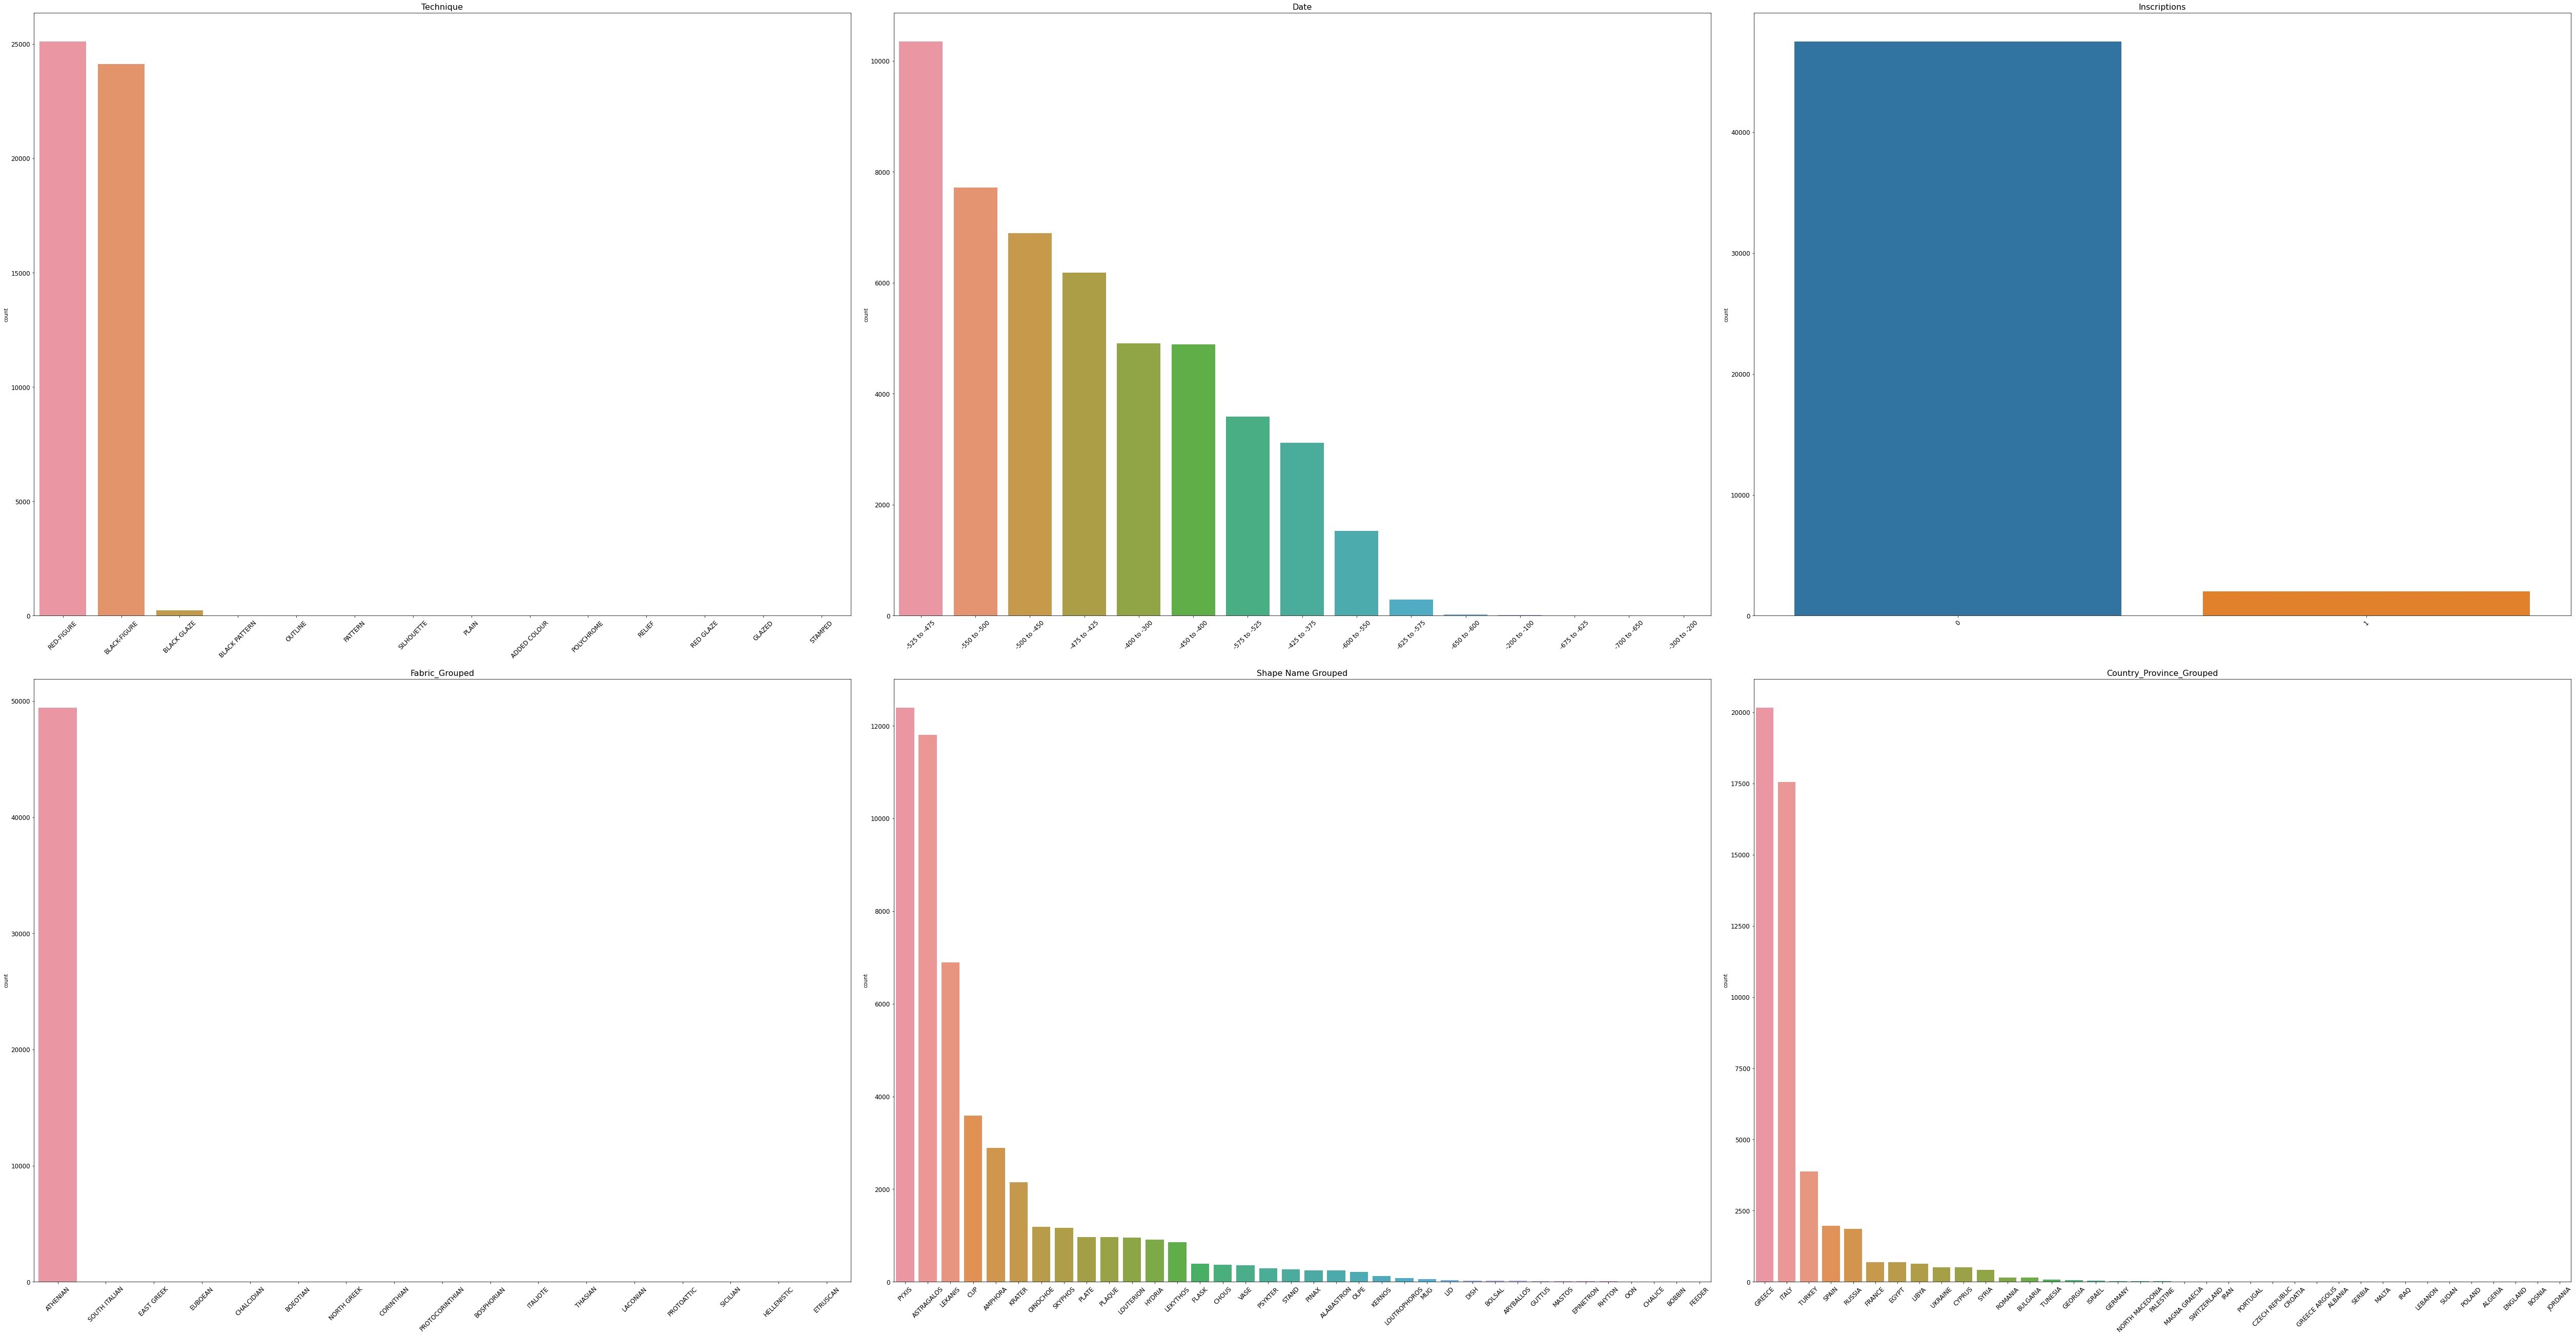

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
categories_to_plot = ['Technique', 'Date', 'Inscriptions', 'Fabric_Grouped','Shape Name Grouped', 'Country_Province_Grouped']

# Set the figure size
plt.figure(figsize=(70, 53))

# Loop through each categorical variable and plot the category counts
for i, column in enumerate(categories_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[column], order=df[column].value_counts().index)
    plt.title(column, fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('')  # Remove x-axis label for better clarity

# Adjust layout
plt.tight_layout(h_pad=2, w_pad=2)

# Show the plot
plt.show()


In [70]:
!pip install kmodes

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [180]:
df.to_csv('test.csv')

In [4]:
import pandas as pd
df = pd.read_csv('test.csv')
df =df.drop("Unnamed: 0", axis =1)
df.head()

,Technique,Date,Inscriptions,Fabric_Grouped,Shape Name Grouped,Country_Province_Grouped
0,BLACK-FIGURE,-525 to -475,0,ATHENIAN,AMPHORA,ITALY
1,BLACK-FIGURE,-550 to -500,0,ATHENIAN,KRATER,GREECE
2,BLACK-FIGURE,-550 to -500,0,ATHENIAN,AMPHORA,ITALY
3,BLACK-FIGURE,-300 to -200,1,ATHENIAN,PYXIS,GREECE
4,RED-FIGURE,-450 to -400,0,ATHENIAN,ASTRAGALOS,GREECE


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming 'df' is your DataFrame with categorical variables
# Replace these with your actual data
# Separate categorical columns
categorical_columns = ['Technique', 'Date', 'Inscriptions', 'Fabric_Grouped','Shape Name Grouped', 'Country_Province_Grouped']

# Create a copy of the DataFrame with only categorical columns
df_categorical = df[categorical_columns].copy()

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for column in categorical_columns:
    df_categorical[column] = le.fit_transform(df_categorical[column])

# Calculate silhouette score for different k values
silhouette_scores = []
for k in range(2, 11):  # You can adjust the range based on your requirements
    kmodes = KModes(n_clusters=k, init='Cao', verbose=0)
    labels = kmodes.fit_predict(df_categorical)
    silhouette_scores.append(silhouette_score(df_categorical, labels))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


In [86]:
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame with categorical variables
# Replace these with your actual data


df_categorical = df.copy()
categorical_columns = ['Technique', 'Date', 'Inscriptions', 'Fabric_Grouped', 'Shape Name Grouped', 'Country_Province_Grouped']

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_categorical[column] = le.fit_transform(df_categorical[column])
    label_encoders[column] = le

# Convert the DataFrame to a NumPy array
X = df_categorical.values

# Assuming you want to cluster into 6 groups, you can adjust as needed
n_clusters = 6

# Create and fit the KModes model
kmodes = KModes(n_clusters=n_clusters, init='Cao', verbose=2)
clusters = kmodes.fit_predict(X)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Decode categorical variables using the stored LabelEncoders
df_decoded = df.copy()
for column, le in label_encoders.items():
    df_decoded[column] = le.inverse_transform(df_decoded[column])

# Print the clusters and decoded DataFrame
print("Clusters:")
for cluster_num in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster_num]
    print(f"\nCluster {cluster_num}:\n{cluster_data}")

print("\nDecoded DataFrame:")
print(df_decoded)


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4553, cost: 81957.0
Run 1, iteration: 2/100, moves: 248, cost: 81957.0
Clusters:

Cluster 0:
       Technique  Date  Inscriptions  Fabric_Grouped  Shape Name Grouped  \
3              3     1             1               0                  31   
4             10     4             0               0                   3   
16             3     7             0               0                  31   
17            10     5             0               0                  33   
24             3     2             0               0                  31   
...          ...   ...           ...             ...                 ...   
49510         10     9             0               0                  16   
49511         10     9             0               0                  16   
49512         10     9             

In [113]:
df_decoded['Cluster'].value_counts()

0    17911
1    14348
3     7237
2     5999
4     3781
5      245
Name: Cluster, dtype: int64

In [114]:
df.head()

,Technique,Date,Inscriptions,Fabric_Grouped,Shape Name Grouped,Country_Province_Grouped
0,BLACK-FIGURE,-525 to -475,0,ATHENIAN,AMPHORA,ITALY
1,BLACK-FIGURE,-550 to -500,0,ATHENIAN,KRATER,GREECE
2,BLACK-FIGURE,-550 to -500,0,ATHENIAN,AMPHORA,ITALY
3,BLACK-FIGURE,-300 to -200,1,ATHENIAN,PYXIS,GREECE
4,RED-FIGURE,-450 to -400,0,ATHENIAN,ASTRAGALOS,GREECE


In [115]:
df_decoded.head()

,Technique,Date,Inscriptions,Fabric_Grouped,Shape Name Grouped,Country_Province_Grouped,Cluster
0,3,7,0,0,1,17,1
1,3,8,0,0,16,12,1
2,3,8,0,0,1,17,1
3,3,1,1,0,31,12,0
4,10,4,0,0,3,12,0


In [116]:
df['Cluster_Label'] = df_decoded['Cluster']
df.head()

,Technique,Date,Inscriptions,Fabric_Grouped,Shape Name Grouped,Country_Province_Grouped,Cluster_Label
0,BLACK-FIGURE,-525 to -475,0,ATHENIAN,AMPHORA,ITALY,1
1,BLACK-FIGURE,-550 to -500,0,ATHENIAN,KRATER,GREECE,1
2,BLACK-FIGURE,-550 to -500,0,ATHENIAN,AMPHORA,ITALY,1
3,BLACK-FIGURE,-300 to -200,1,ATHENIAN,PYXIS,GREECE,0
4,RED-FIGURE,-450 to -400,0,ATHENIAN,ASTRAGALOS,GREECE,0


In [117]:
df['Cluster_Label'].value_counts()

0    17911
1    14348
3     7237
2     5999
4     3781
5      245
Name: Cluster_Label, dtype: int64

In [118]:
df.columns

Index(['Technique', 'Date', 'Inscriptions', 'Fabric_Grouped',
       'Shape Name Grouped', 'Country_Province_Grouped', 'Cluster_Label'],
      dtype='object')

In [119]:
dfr = df.copy()
dfr.head()

,Technique,Date,Inscriptions,Fabric_Grouped,Shape Name Grouped,Country_Province_Grouped,Cluster_Label
0,BLACK-FIGURE,-525 to -475,0,ATHENIAN,AMPHORA,ITALY,1
1,BLACK-FIGURE,-550 to -500,0,ATHENIAN,KRATER,GREECE,1
2,BLACK-FIGURE,-550 to -500,0,ATHENIAN,AMPHORA,ITALY,1
3,BLACK-FIGURE,-300 to -200,1,ATHENIAN,PYXIS,GREECE,0
4,RED-FIGURE,-450 to -400,0,ATHENIAN,ASTRAGALOS,GREECE,0


In [120]:
dfr.shape

(49521, 7)

In [133]:
df.shape

(49521, 10)

In [136]:
dfr[['Vase Number']] = df[['Vase Number']]

In [138]:
dfr.head()

,Technique,Date,Inscriptions,Fabric_Grouped,Shape Name Grouped,Country_Province_Grouped,Cluster_Label,Vase Number
0,BLACK-FIGURE,-525 to -475,0,ATHENIAN,AMPHORA,ITALY,1,1.0
1,BLACK-FIGURE,-550 to -500,0,ATHENIAN,KRATER,GREECE,1,2.0
2,BLACK-FIGURE,-550 to -500,0,ATHENIAN,AMPHORA,ITALY,1,3.0
3,BLACK-FIGURE,-300 to -200,1,ATHENIAN,PYXIS,GREECE,0,12.0
4,RED-FIGURE,-450 to -400,0,ATHENIAN,ASTRAGALOS,GREECE,0,22.0


In [141]:
dfr = dfr.drop('Vase Number', axis=1)

In [142]:
dfr.head()

,Technique,Date,Inscriptions,Fabric_Grouped,Shape Name Grouped,Country_Province_Grouped,Cluster_Label
0,BLACK-FIGURE,-525 to -475,0,ATHENIAN,AMPHORA,ITALY,1
1,BLACK-FIGURE,-550 to -500,0,ATHENIAN,KRATER,GREECE,1
2,BLACK-FIGURE,-550 to -500,0,ATHENIAN,AMPHORA,ITALY,1
3,BLACK-FIGURE,-300 to -200,1,ATHENIAN,PYXIS,GREECE,0
4,RED-FIGURE,-450 to -400,0,ATHENIAN,ASTRAGALOS,GREECE,0


In [143]:
dfr.shape

(49521, 7)

In [144]:
dfr.columns

Index(['Technique', 'Date', 'Inscriptions', 'Fabric_Grouped',
       'Shape Name Grouped', 'Country_Province_Grouped', 'Cluster_Label'],
      dtype='object')

In [145]:
# Assuming 'df' is your DataFrame after clustering
# Replace these with your actual data
df = dfr.copy()

# Group by the 'Cluster_Label' column and count the occurrences of each unique value for each categorical column
cluster_counts = df.groupby('Cluster_Label').apply(lambda x: x.drop('Cluster_Label', axis=1).mode().iloc[0])

# Display the counts for each cluster
print("Categorical value counts for each cluster:")
print(cluster_counts)


Categorical value counts for each cluster:
0                 Technique          Date  Inscriptions Fabric_Grouped  \
Cluster_Label                                                            
0                RED-FIGURE  -525 to -475             0       ATHENIAN   
1              BLACK-FIGURE  -550 to -500             0       ATHENIAN   
2              BLACK-FIGURE  -500 to -450             0       ATHENIAN   
3                RED-FIGURE  -475 to -425             0       ATHENIAN   
4                RED-FIGURE  -400 to -300             0       ATHENIAN   
5                RED-FIGURE  -450 to -400             0       ATHENIAN   

0             Shape Name Grouped Country_Province_Grouped  
Cluster_Label                                              
0                          PYXIS                   GREECE  
1                     ASTRAGALOS                    ITALY  
2                        LEKANIS                   GREECE  
3                            CUP                    ITALY  
4   

In [146]:
cluster_counts.head()

,Technique,Date,Inscriptions,Fabric_Grouped,Shape Name Grouped,Country_Province_Grouped
Cluster_Label,,,,,,
0,RED-FIGURE,-525 to -475,0,ATHENIAN,PYXIS,GREECE
1,BLACK-FIGURE,-550 to -500,0,ATHENIAN,ASTRAGALOS,ITALY
2,BLACK-FIGURE,-500 to -450,0,ATHENIAN,LEKANIS,GREECE
3,RED-FIGURE,-475 to -425,0,ATHENIAN,CUP,ITALY
4,RED-FIGURE,-400 to -300,0,ATHENIAN,ASTRAGALOS,SPAIN


In [147]:
dfr['Date'].value_counts()

-525 to -475    10353
-550 to -500     7715
-500 to -450     6900
-475 to -425     6189
-400 to -300     4910
-450 to -400     4887
-575 to -525     3588
-425 to -375     3114
-600 to -550     1529
-625 to -575      293
-650 to -600       19
-200 to -100        9
-675 to -625        6
-700 to -650        5
-300 to -200        4
Name: Date, dtype: int64

In [150]:
dfr.to_csv('Clustered_pottery.csv')

In [151]:
dfr.head()

,Technique,Date,Inscriptions,Fabric_Grouped,Shape Name Grouped,Country_Province_Grouped,Cluster_Label
0,BLACK-FIGURE,-525 to -475,0,ATHENIAN,AMPHORA,ITALY,1
1,BLACK-FIGURE,-550 to -500,0,ATHENIAN,KRATER,GREECE,1
2,BLACK-FIGURE,-550 to -500,0,ATHENIAN,AMPHORA,ITALY,1
3,BLACK-FIGURE,-300 to -200,1,ATHENIAN,PYXIS,GREECE,0
4,RED-FIGURE,-450 to -400,0,ATHENIAN,ASTRAGALOS,GREECE,0


In [152]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(dfr[], labels)

NameError: name 'data' is not defined